In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [4]:
for p in durak_game.players:
    print(p.player_mode)

MODE_WAIT
MODE_ATTACK
MODE_DEFEND
MODE_WAIT


In [5]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: D2,S5,D0,S3,D4,H3,D6,C6,S7,D1,H4,H5.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: D3,C2,C4,C8,S4,S8.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: D7,C1,H0,H1,H7,S0.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: C0,C3,C5,H6,S2,S6.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D5,D8,C7,H2,H8,S1.
Size: 6
-----------------------

Trump suit is Hearts
---------------------



In [6]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D7,C1,H0,H1,H7,S0.
Size: 6
-----------------------



In [7]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: C0,C3,C5,H6,S2,S6.
Size: 6
-----------------------



In [8]:
durak_game.playing_field.first_attack

True

In [9]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((0, 0),),
 ((1, 1),),
 ((2, 0),),
 ((2, 1),),
 ((2, 7),),
 ((3, 7),),
 ((0, 0), (2, 0)),
 ((1, 1), (2, 1)),
 ((2, 7), (3, 7))]

In [10]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((3, 7),)


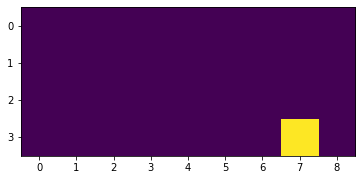

In [11]:
durak_game.playing_field.execute_move(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

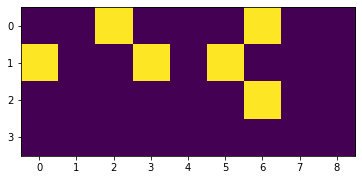

In [12]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [13]:
# player = durak_game.players[p_def_idx]
# attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
# n_vals = durak_game.playing_field.n_vals
# n_suits = durak_game.playing_field.n_suits
# nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
# valid_defenses = np.zeros_like(durak_game.playing_field.field)
# f = lambda x : (x // n_vals + 1)*n_vals

# for att_idx in attack_idxs:
#     valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
# for att_idx in nontrump_attack_idxs:
#     valid_defenses[:n_vals, att_idx] = 1

# if durak_game.playing_field.first_attack:
#     valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

# valid_defenses *= player.hand.ravel()[:,np.newaxis]
# plt.imshow(valid_defenses)

In [14]:
valid_defenses = np.zeros_like(durak_game.playing_field.field)
durak_game.playing_field.defense_combinations(valid_defenses)

['ACTION_GIVEUP']

In [15]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((2, 34),), ((6, 34),)]


In [16]:
random_defend = choice(defend_actions)
print(random_defend)

((2, 34),)


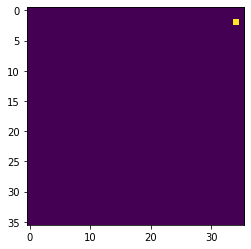

In [17]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

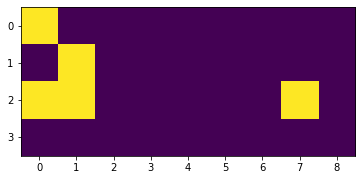

In [18]:
plt.imshow(durak_game.players[p_att_idx].hand)

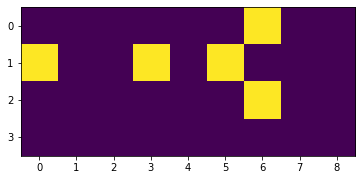

In [19]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [20]:
choice(durak_game.playing_field.attack_players()).player_id

1

In [21]:
defend_id = durak_game.playing_field.defend_player().player_id
print(defend_id)

2


In [22]:
durak_game.players[0].attack()
durak_game.players[1].defend()

In [23]:
print(defend_id)

2


In [24]:
d = Cards.DurakDeck()
d.cards

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [25]:
initial_attack_ids = [p.player_id for p in durak_game.playing_field.attack_players()]

In [26]:
attack_ids = [p.player_id for p in durak_game.players if p.is_attack() and p.player_id != initial_attack_ids[0]]
attack_ids

[3]